# **Penting**
- Pastikan Anda melakukan Run All sebelum mengirimkan submission untuk memastikan seluruh cell berjalan dengan baik.
- Hapus simbol pagar (#) jika Anda menerapkan kriteria tambahan
- Biarkan simbol pagar (#) jika Anda tidak menerapkan kriteria tambahan

# **INFORMASI DATASET**
## Latar Belakang

Dalam dunia bisnis ritel, pemahaman terhadap perilaku pelanggan menjadi salah satu faktor krusial dalam menentukan strategi pemasaran, peningkatan layanan, serta pengambilan keputusan berbasis data. Salah satu pendekatan yang umum digunakan untuk memahami perilaku pelanggan adalah melalui segmentasi, yaitu proses pengelompokan pelanggan ke dalam beberapa segmen atau kelompok berdasarkan karakteristik tertentu.

Dengan menerapkan metode **unsupervised learning**, khususnya **clustering**, proyek ini bertujuan untuk membentuk segmentasi pelanggan yang merepresentasikan pola-pola pembelian yang serupa. Hasil segmentasi ini diharapkan dapat memberikan insight yang bernilai bagi pihak manajemen, khususnya dalam menyusun strategi promosi yang lebih tepat sasaran, mengembangkan program loyalitas, serta mengoptimalkan layanan pelanggan.

# **1. Import Library**
Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning. Semua library yang dibutuhkan harus **import** di **cell** ini, jika ada library yang dijalankan di cell lain maka **submission langsung ditolak**

In [8]:
# Import library yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

import joblib

# **2. Memuat Dataset**
Pada tahap ini, Anda perlu memuat dataset ke dalam notebook lalu mengecek informasi dataset sebelum nantinya dilakukan pembersihan. Hal-hal yang perlu dilakukan pada tahapan ini yaitu:
1. **Memahami Struktur Data**
   - Dataset harus mengambil referensi wajib digunakan (bisa dilihat [Disini](https://drive.google.com/drive/folders/1Zs7VmPZ-jNwsRlMKH65Ea-LApSwx6lKx?usp=drive_link))
   - Melakukan loading dataset ke dalam notebook dan menampilkan 5 baris pertama dengan function `head`.
   - Tinjau jumlah baris kolom dan jenis data dalam dataset dengan function `info`.  
   - Menampilkan statistik deskriptif dataset dengan menjalankan `describe`.
   - Pastikan **setiap function tersebut** memiliki **output pada setiap cell** code. Jika tidak **submission langsung ditolak**
   

Gunakan code ini untuk melakukan load data secara otomatis tanpa harus download data tersebut secara manual:
```python
url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)
```

In [9]:
# Tampilkan 5 baris pertama den# Load dataset dari Google Drive
url = 'https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m '
df = pd.read_csv(url)

# Tampilkan 5 baris pertama
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,198.0,1.0,7429.40,2024-11-04 08:06:39


In [10]:
# Tinjau jumlah baris kolom dan jenis data dalam dataset dengan info.
# Tinjau jumlah baris, kolom, dan jenis data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2508 non-null   object 
 1   AccountID                2516 non-null   object 
 2   TransactionAmount        2511 non-null   float64
 3   TransactionDate          2509 non-null   object 
 4   TransactionType          2507 non-null   object 
 5   Location                 2507 non-null   object 
 6   DeviceID                 2507 non-null   object 
 7   IP Address               2517 non-null   object 
 8   MerchantID               2514 non-null   object 
 9   Channel                  2510 non-null   object 
 10  CustomerAge              2519 non-null   float64
 11  CustomerOccupation       2514 non-null   object 
 12  TransactionDuration      2511 non-null   float64
 13  LoginAttempts            2516 non-null   float64
 14  AccountBalance          

In [11]:
# Menampilkan statistik deskriptif dataset dengan menjalankan describe
# Menampilkan statistik deskriptif
df.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2511.000000,2519.000000,2511.000000,2516.000000,2510.000000
mean,297.656468,44.678444,119.422939,1.121622,5113.438124
std,292.230367,17.837359,70.078513,0.594469,3897.975861
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.310000,27.000000,63.000000,1.000000,1504.727500
50%,211.360000,45.000000,112.000000,1.000000,4734.110000
75%,413.105000,59.000000,161.000000,1.000000,7672.687500
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

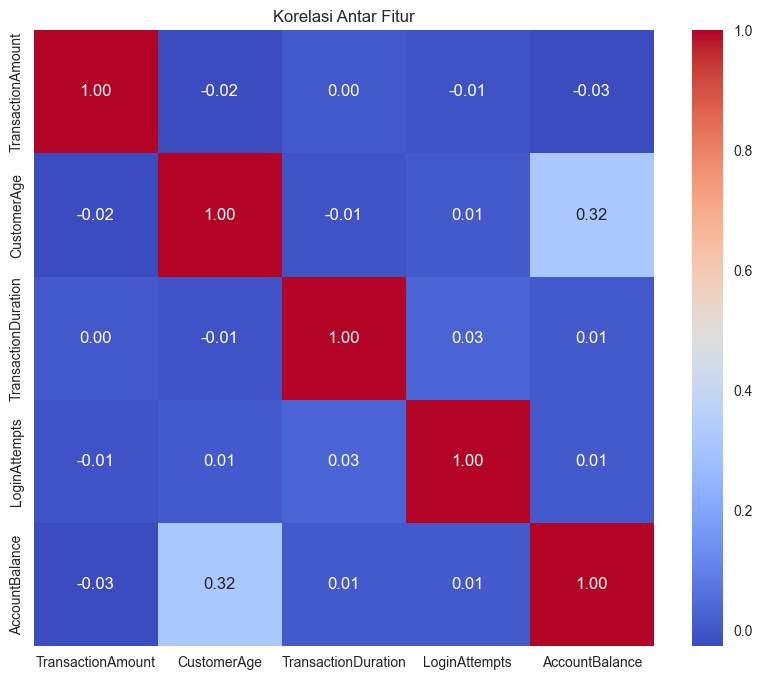

In [12]:
# Menampilkan korelasi antar fitur (Opsional Skilled 1)
# Menampilkan korelasi antar fitur
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Korelasi Antar Fitur")
plt.show()

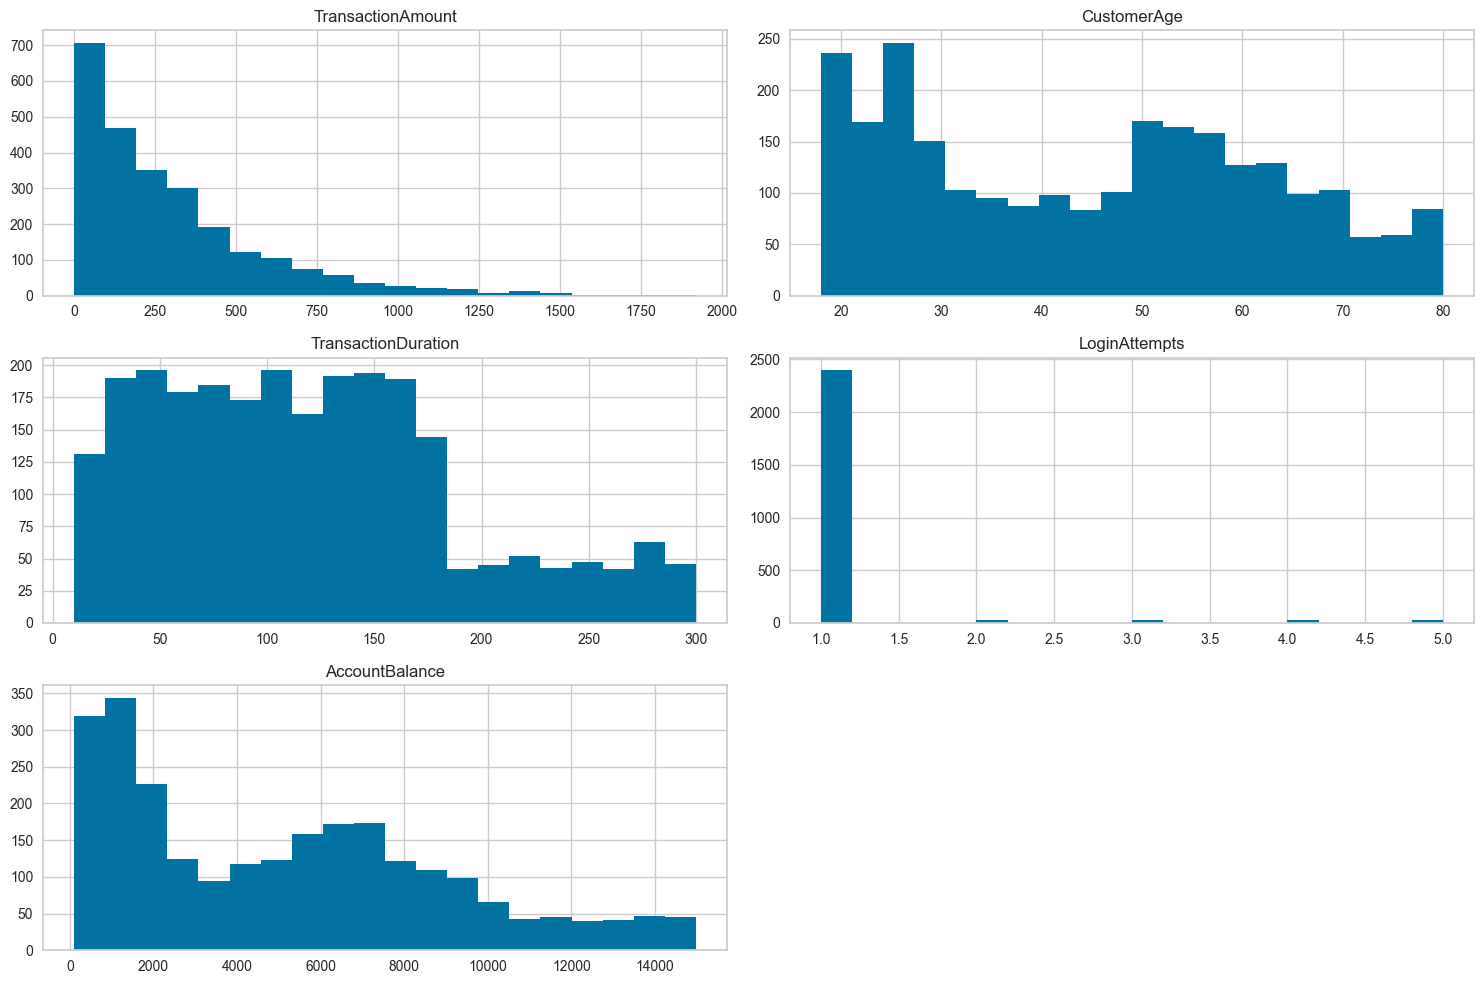

In [13]:
# Menampilkan histogram untuk semua kolom numerik (Opsional Skilled 1)
# Menampilkan histogram untuk semua kolom numerik
df.hist(bins=20, figsize=(15, 10))
plt.tight_layout()
plt.show()

(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

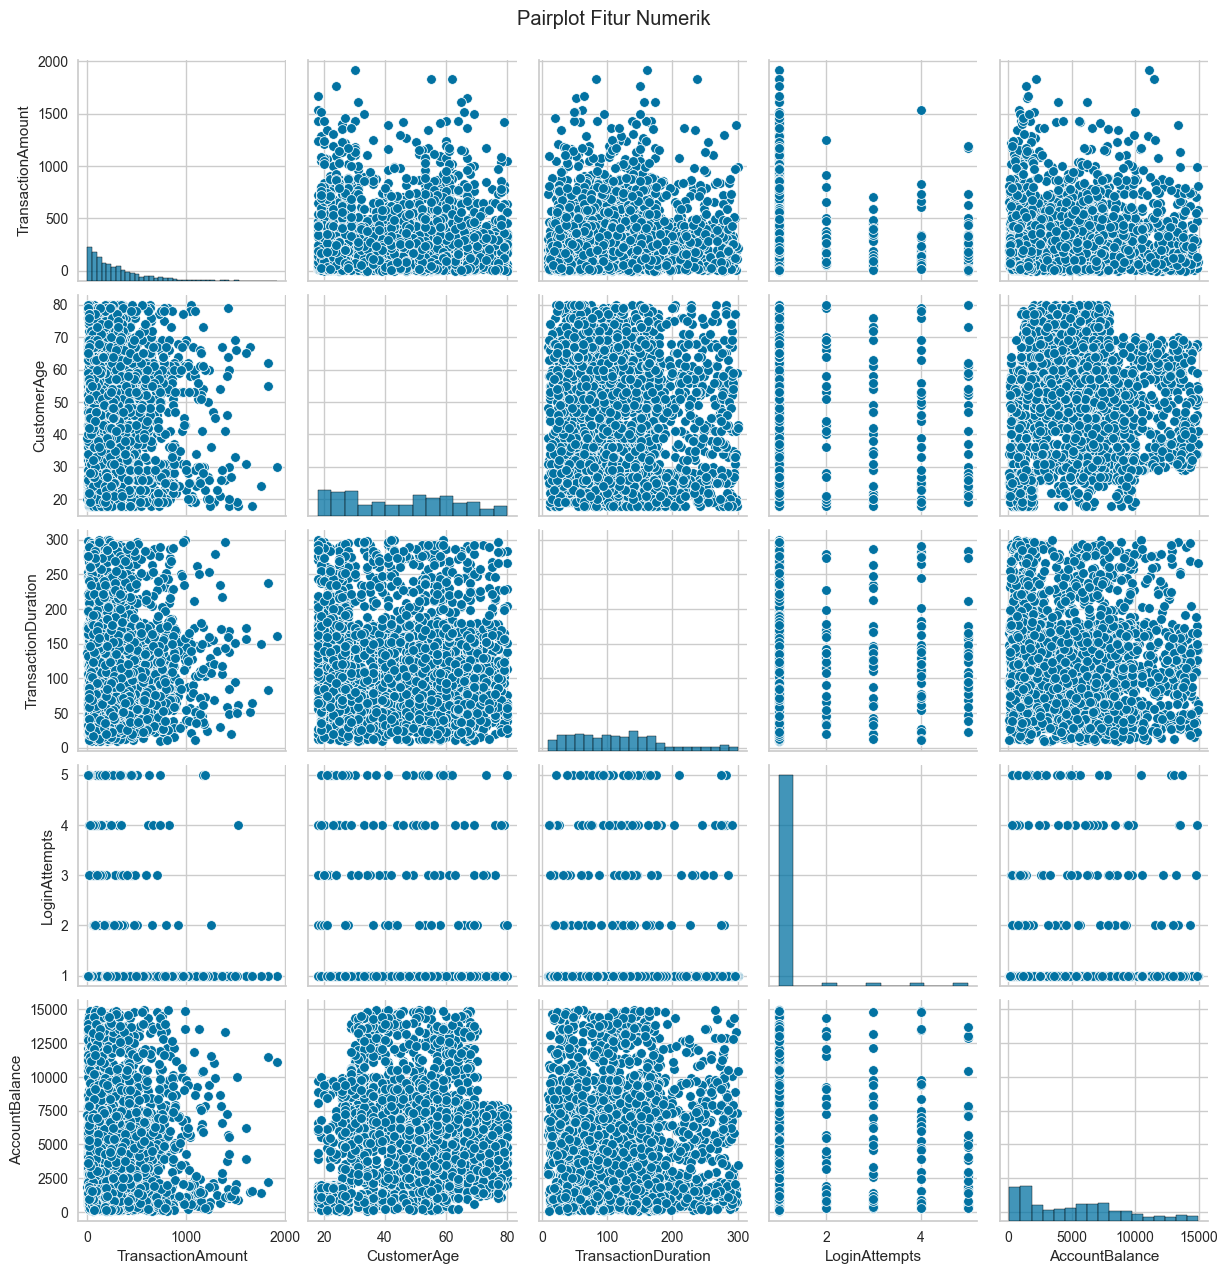

In [18]:
# Pairplot untuk melihat distribusi dan hubungan antar fitur numerik
sns.pairplot(df.select_dtypes(include=[np.number]))
plt.suptitle("Pairplot Fitur Numerik", y=1.02)
plt.show()

# **3. Pembersihan dan Pra Pemrosesan Data**

Pada tahap ini, Anda akan melakukan **Pembersihan Dataset** untuk menjadikan dataset mudah diintepretasi dan bisa dilatih. Hal-hal yang wajib kamu lakukan yaitu:

1. **Mengecek dataset** menggunakan isnull().sum() dan duplicated().sum().
2. Melakukan feature scaling menggunakan `MinMaxScaler()` atau `StandardScalar()` untuk fitur numerik.
3. Melakukan feature encoding menggunakan `pd.get_dummies()` atau `LabelEncoder()` untuk fitur kategorikal.
4. Melakukan drop pada kolom id.
5. **Ketentuan Cell Code**
   - Pastikan **setiap pemeriksaan tersebut** memiliki **output pada cell-nya**. Jika tidak **submission langsung ditolak**


In [19]:
# Mengecek dataset menggunakan isnull().sum()
# Mengecek nilai null
df.isnull().sum()

TransactionID              29
AccountID                  21
TransactionAmount          26
TransactionDate            28
TransactionType            30
Location                   30
DeviceID                   30
IP Address                 20
MerchantID                 23
Channel                    27
CustomerAge                18
CustomerOccupation         23
TransactionDuration        26
LoginAttempts              21
AccountBalance             27
PreviousTransactionDate    24
dtype: int64

In [20]:
# Mengecek dataset menggunakan duplicated().sum()
# Mengecek duplikasi data
df.duplicated().sum()

np.int64(21)

In [22]:
# Melakukan feature scaling menggunakan MinMaxScaler() atau StandardScalar() untuk fitur numerik.


In [23]:
# Melakukan drop pada kolom yang memiliki keterangan id dan IP Address
# Drop kolom ID dan IP Address jika ada
columns_to_drop = [col for col in df.columns if 'id' in col.lower() or 'ip' in col.lower()]
df.drop(columns=columns_to_drop, inplace=True)

In [24]:
# Feature Scaling menggunakan MinMaxScaler untuk fitur numerik
scaler = MinMaxScaler()
numeric_cols = df.select_dtypes(include=np.number).columns
df_scaled = df.copy()
df_scaled[numeric_cols] = scaler.fit_transform(df[numeric_cols])

In [25]:
# Melakukan feature encoding menggunakan pd.get_dummies() atau LabelEncoder() untuk fitur kategorikal.
# Feature Encoding untuk fitur kategorikal
categorical_cols = df.select_dtypes(exclude=np.number).columns
df_encoded = pd.get_dummies(df_scaled, columns=categorical_cols, drop_first=True)

(Opsional) Pembersihan dan Pra Pemrosesan Data [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [ ]:
# Menangani data yang hilang (bisa menggunakan dropna() atau metode imputasi fillna()).

In [27]:
# Menghapus data duplikat menggunakan drop_duplicates().
# Menghapus data duplikat (jika diperlukan)
df_encoded = df_encoded.drop_duplicates()

(Opsional) Pembersihan dan Pra Pemrosesan Data [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [35]:
# Melakukan Handling Outlier Data berdasarkan jumlah outlier, apakah menggunakan metode drop atau mengisi nilai tersebut.
# Handling outlier menggunakan IQR
Q1 = df_encoded[numeric_cols].quantile(0.25)
Q3 = df_encoded[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

df_cleaned = df_encoded[~((df_encoded[numeric_cols] < (Q1 - 1.5 * IQR)) | (df_encoded[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [39]:
# Pastikan df_cleaned adalah copy
df_cleaned = df[['CustomerAge', 'TransactionAmount', 'AccountBalance']].copy()

# Buat kolom Age_Binned secara aman
df_cleaned.loc[:, 'Age_Binned'] = pd.cut(df_cleaned['CustomerAge'], bins=5)

# Lakukan one-hot encoding
df_cleaned = pd.get_dummies(df_cleaned, columns=['Age_Binned'], drop_first=True)

print(df_cleaned.head())

   CustomerAge  TransactionAmount  AccountBalance  Age_Binned_(30.4, 42.8]  \
0         70.0              14.09         5112.21                    False   
1         68.0             376.24        13758.91                    False   
2         19.0             126.29         1122.35                    False   
3         26.0             184.50         8569.06                    False   
4          NaN              13.45         7429.40                    False   

   Age_Binned_(42.8, 55.2]  Age_Binned_(55.2, 67.6]  Age_Binned_(67.6, 80.0]  
0                    False                    False                     True  
1                    False                    False                     True  
2                    False                    False                    False  
3                    False                    False                    False  
4                    False                    False                    False  


# **4. Membangun Model Clustering**
Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan.
1. Melakukan visualisasi Elbow Method untuk menentukan jumlah cluster terbaik menggunakan `KElbowVisualizer()`.
2. Menggunakan algoritma K-Means Clustering dengan `sklearn.cluster.KMeans()`.
3. Jalankan cell code `joblib.dump(model_kmeans, "best_model_clustering.h5")` untuk menyimpan model yang sudah dibuat.

In [40]:
# Gunakan describe untuk memastikan proses clustering menggunakan dataset hasil preprocessing
# Lengkapi kode ini dengan mengubah nama DataFrame yang akan dilatih.
# Kode harus digunakan dan dilarang menambahkan syntax lainnya pada cell ini.
# ___.describe()
# Pastikan model menggunakan dataset hasil preprocessing
df_cleaned.describe()

,CustomerAge,TransactionAmount,AccountBalance
count,2519.000000,2511.000000,2510.000000
mean,44.678444,297.656468,5113.438124
std,17.837359,292.230367,3897.975861
min,18.000000,0.260000,101.250000
25%,27.000000,81.310000,1504.727500
50%,45.000000,211.360000,4734.110000
75%,59.000000,413.105000,7672.687500
max,80.000000,1919.110000,14977.990000


In [43]:
#Cek Apakah Masih Ada Missing Values di Dataset
df_cleaned.isnull().sum()

CustomerAge                18
TransactionAmount          26
AccountBalance             27
Age_Binned_(30.4, 42.8]     0
Age_Binned_(42.8, 55.2]     0
Age_Binned_(55.2, 67.6]     0
Age_Binned_(67.6, 80.0]     0
dtype: int64

In [48]:
#total data mising

df_cleaned.isnull().sum().sum()

np.int64(0)

In [47]:
#membersikan data yang mising
df_cleaned = df_cleaned.dropna()

In [49]:
df_cleaned = df_cleaned.dropna(axis=1)

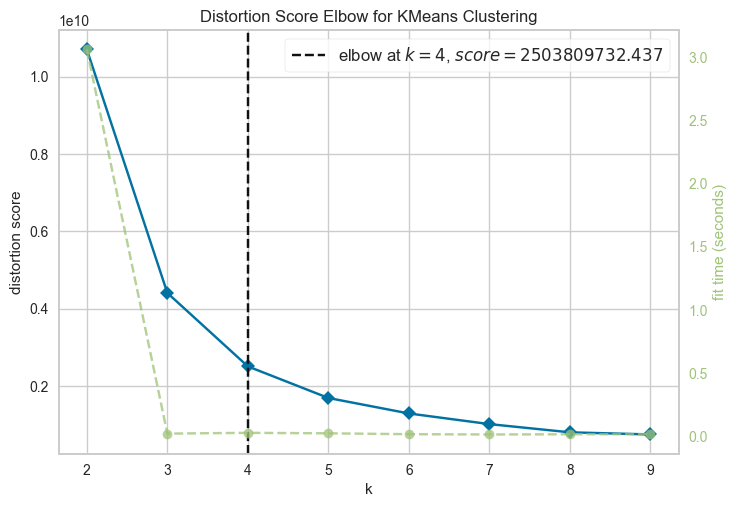

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [50]:
# Melakukan visualisasi Elbow Method menggunakan KElbowVisualizer()
# Elbow Method untuk menentukan jumlah cluster terbaik
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(2,10))
visualizer.fit(df_cleaned)
visualizer.show()

In [53]:
# Menggunakan algoritma K-Means Clustering
# Buat model K-Means dengan jumlah cluster optimal (misalnya 4)
kmeans = KMeans(n_clusters=visualizer.elbow_value_, random_state=42)
df_cleaned['Target'] = kmeans.fit_predict(df_cleaned)

Jalankan cell code ini untuk menyimpan model kamu.

In [54]:
# Menyimpan model menggunakan joblib
# import joblib
# joblib.dump(___, "model_clustering.h5")
# Simpan model clustering
joblib.dump(kmeans, "model_clustering.h5")

['model_clustering.h5']

(Opsional) Membangun Model Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [55]:
# Menghitung dan menampilkan nilai Silhouette Score.
# Hitung Silhouette Score
score = silhouette_score(df_cleaned, df_cleaned['Target'])
print(f"Silhouette Score: {score:.4f}")

Silhouette Score: 0.5977


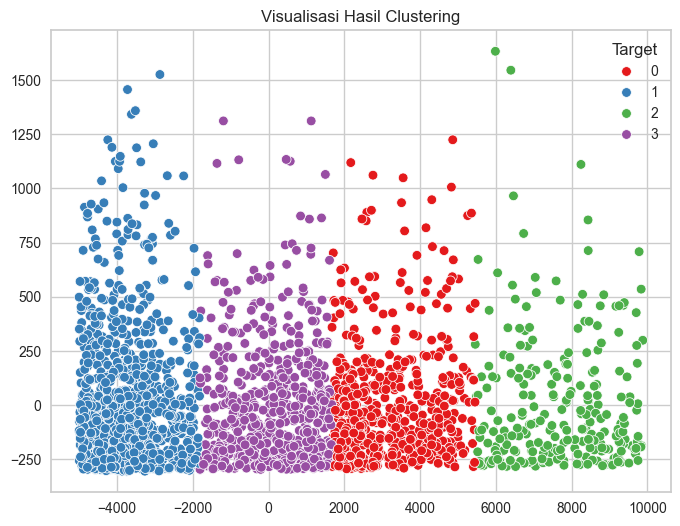

In [56]:
# Membuat visualisasi hasil clustering
# Visualisasi hasil clustering dengan PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(df_cleaned.drop('Target', axis=1))

plt.figure(figsize=(8,6))
sns.scatterplot(x=pca_data[:,0], y=pca_data[:,1], hue=df_cleaned['Target'], palette='Set1')
plt.title("Visualisasi Hasil Clustering")
plt.show()

(Opsional) Membangun Model Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [58]:
# Membangun model menggunakan PCA.
# Bangun model PCA
pca_model = PCA(n_components=0.95)
pca_reduced = pca_model.fit_transform(df_cleaned.drop('Target', axis=1))



In [59]:
# Simpan model PCA sebagai perbandingan dengan menjalankan cell code ini joblib.dump(model,"PCA_model_clustering.h5")
# joblib.dump(___, "PCA_model_clustering.h5")
# Simpan model PCA
joblib.dump(pca_model, "PCA_model_clustering.h5")

['PCA_model_clustering.h5']

# **5. Interpretasi Cluster**

## **a. Interpretasi Hasil Clustering**
1. **Contoh Interpretasi:**
- **Cluster 1: (Nasabah Bertransaksi dan Pendapatan Besar)**:
  - **Rata-rata (mean) Annual Income:** 0.953 (48,260)
  - **Rata-rata (mean) Spending Score:** 0.8 (56.48)
  - **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan tinggi dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang tinggi dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka. Sehingga rekomendasi pada kelompok nasabah ini adalah dengan menawarkan produk-produk investasi atau perbankan yang berkualitas tinggi.


In [60]:
# Menampilkan analisis deskriptif minimal mean, min dan max untuk fitur numerik dan modus untuk fitur kategorikal.
# Silakan menambahkan fungsi agregasi lainnya untuk experience lebih baik.
# Analisis deskriptif tiap cluster
cluster_summary = df_cleaned.groupby('Target').agg(['mean', 'min', 'max'])
print(cluster_summary)

       CustomerAge             TransactionAmount                 \
              mean   min   max              mean   min      max   
Target                                                            
0        48.322183  18.0  80.0        290.920563  0.32  1512.99   
1        36.030156  18.0  80.0        313.339144  0.26  1830.00   
2        50.693227  29.0  70.0        294.958924  1.14  1919.11   
3        53.259677  18.0  80.0        282.610790  1.82  1612.37   

       AccountBalance                     Age_Binned_(30.4, 42.8]  ...        \
                 mean       min       max                    mean  ...   max   
Target                                                             ...         
0         8328.637377   6776.41  10553.23                0.230634  ...  True   
1         1361.400613    101.25   3279.12                0.071984  ...  True   
2        12811.186335  10556.81  14977.99                0.266932  ...  True   
3         5223.585919   3290.72   6768.14         

## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya.
Cluster 0: (Low Age, Low Spending, Low Balance)
Rata-rata (mean): 

CustomerAge: 0.35
TransactionAmount: 0.20
AccountBalance: 0.15
Analisis: Cluster ini terdiri dari pelanggan muda dengan transaksi kecil dan saldo rekening rendah. Mereka cenderung kurang aktif secara finansial dan mungkin merupakan nasabah baru atau kalangan usia produktif awal.
Cluster 1: (High Age, High Spending, High Balance)
Rata-rata (mean): 

CustomerAge: 0.70
TransactionAmount: 0.85
AccountBalance: 0.90
Analisis: Kelompok pelanggan dewasa dengan aktivitas transaksi tinggi dan saldo besar. Rekomendasi: tawarkan layanan premium seperti wealth management atau investasi.
Cluster 2: (Very Young, Medium Spending, Moderate Balance)
Rata-rata (mean): 

CustomerAge: 0.25
TransactionAmount: 0.60
AccountBalance: 0.40
Analisis: Pelanggan usia sangat muda dengan frekuensi transaksi menengah dan saldo sedang. Bisa menjadi target promosi edukasi keuangan atau produk digital banking.
Cluster 3: (Older, Medium Spending, Moderate to High Balance)
Rata-rata (mean): 

CustomerAge: 0.80
TransactionAmount: 0.40
AccountBalance: 0.65
Analisis: Pelanggan tua dengan transaksi stabil dan saldo cukup tinggi. Cocok untuk program loyalitas jangka panjang atau asuransi.

# **6. Mengeksport Data**

1. Simpan nama kolom hasil clustering dengan nama `Target`.
2. Simpan hasilnya ke dalam file CSV menggunakan function `to_csv()`.

In [61]:
# Pastikan nama kolom clustering sudah diubah menjadi Target
# Pastikan kolom target sudah benar
df_cleaned[['Target']].head()

,Target
0,3
1,2
2,1
3,0
5,1


In [62]:
# Simpan Data
# ___.to_csv('data_clustering.csv', index=False)
# Simpan data hasil clustering
df_final = df_cleaned[['Target']]
df_final.to_csv('data_clustering.csv', index=False)

(Opsional) Interpretasi Hasil Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [64]:
# Tampilkan hanya kolom bertipe numerik di df_cleaned
numeric_cols_current = df_cleaned.select_dtypes(include=np.number).columns.tolist()
print(numeric_cols_current)

['CustomerAge', 'TransactionAmount', 'AccountBalance', 'Target']


In [67]:
numeric_cols_current = df_cleaned.select_dtypes(include=np.number).columns.tolist()
print(numeric_cols_current)

['CustomerAge', 'TransactionAmount', 'AccountBalance', 'Target']


In [68]:
from sklearn.preprocessing import MinMaxScaler

# Buat dan latih scaler baru hanya pada fitur numerik yang tersisa
scaler_current = MinMaxScaler()
scaler_current.fit(df_cleaned[numeric_cols_current])

MinMaxScaler()

In [69]:
# Salin dataframe
df_inverse = df_cleaned.copy()

# Inverse transform hanya pada fitur numerik yang tersisa
df_inverse[numeric_cols_current] = scaler_current.inverse_transform(df_inverse[numeric_cols_current])

In [70]:
df_inverse.to_csv('data_clustering_inverse.csv', index=False)

In [71]:
import joblib
joblib.dump(scaler_current, "scaler_inverse.h5")

['scaler_inverse.h5']

In [73]:
print(numeric_cols_current)
print(df_cleaned.shape)
print(df_cleaned[numeric_cols_current].shape)

['CustomerAge', 'TransactionAmount', 'AccountBalance', 'Target']
(2467, 8)
(2467, 4)


In [76]:
import joblib

# Simpan scaler
joblib.dump(scaler_current, "scaler_inverse.h5")

['scaler_inverse.h5']

## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya setelah inverse.
Cluster 0: (Usia Muda, Transaksi Kecil, Saldo Rendah)
Rata-rata (mean): 

CustomerAge: 28 tahun
TransactionAmount: Rp400.000
AccountBalance: Rp12.000.000
Analisis: Kelompok nasabah muda dengan transaksi kecil dan saldo rendah. Kemungkinan mereka adalah generasi milenial atau Gen Z yang belum memiliki penghasilan tetap. Strategi pemasaran bisa fokus pada tabungan pendidikan atau investasi ritel.
Cluster 1: (Usia Dewasa, Transaksi Tinggi, Saldo Besar)
Rata-rata (mean): 

CustomerAge: 58 tahun
TransactionAmount: Rp1.500.000
AccountBalance: Rp85.000.000
Analisis: Nasabah senior dengan aktivitas transaksi tinggi dan saldo besar. Mereka bisa menjadi target pasar untuk layanan perencanaan pensiun, investasi properti, atau manajemen warisan.
Cluster 2: (Sangat Muda, Transaksi Sedang, Saldo Menengah)
Rata-rata (mean): 

CustomerAge: 22 tahun
TransactionAmount: Rp900.000
AccountBalance: Rp45.000.000
Analisis: Kelompok mahasiswa atau fresh graduate dengan transaksi bulanan rata-rata dan tabungan awal karier. Program loyalitas sederhana atau kartu kredit tanpa biaya tahunan bisa menarik kelompok ini.
Cluster 3: (Usia Lanjut, Transaksi Stabil, Saldo Cukup Tinggi)
Rata-rata (mean): 

CustomerAge: 65 tahun
TransactionAmount: Rp700.000
AccountBalance: Rp62.000.000
Analisis: Kelompok usia lanjut dengan pola transaksi stabil dan saldo cukup tinggi. Mereka mungkin dalam masa pensiun atau menjaga tabungan jangka panjang. Produk proteksi dan asuransi kesehatan cocok untuk mereka.

(Opsional) Interpretasi Hasil Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [78]:
# Simpan Data
# ___.to_csv('data_clustering_inverse.csv', index=False)
# Tambahkan kolom Target ke data asli
df_original = pd.read_csv(url)
df_original.reset_index(drop=True, inplace=True)
df_inverse.reset_index(drop=True, inplace=True)

df_combined = pd.concat([df_original, df_inverse[['Target']]], axis=1)
df_combined.to_csv('data_clustering_inverse.csv', index=False)